<a href="https://colab.research.google.com/github/evireim/data/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел
# Анализ данных
Уйдёт абонент ил останется

Импортируем библиотеки и загружаем данные

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Проверяем типы данных колонок.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Статистические метрики для числовых колонок

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000




**Поиск отсутствующих значений.**

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**График CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

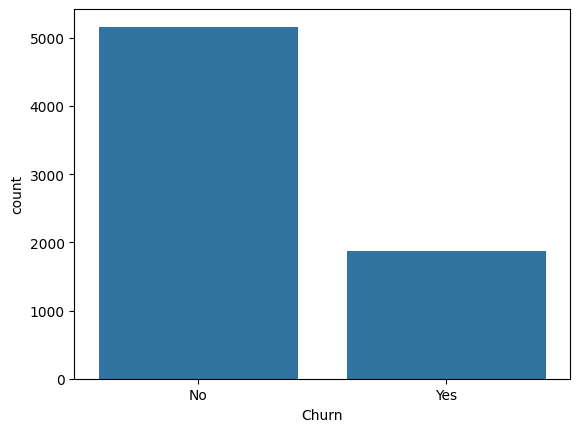

In [ ]:
sns.countplot(data=df, x='Churn')

**Распределение колонки TotalCharges по категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='TotalCharges', ylabel='Churn'>

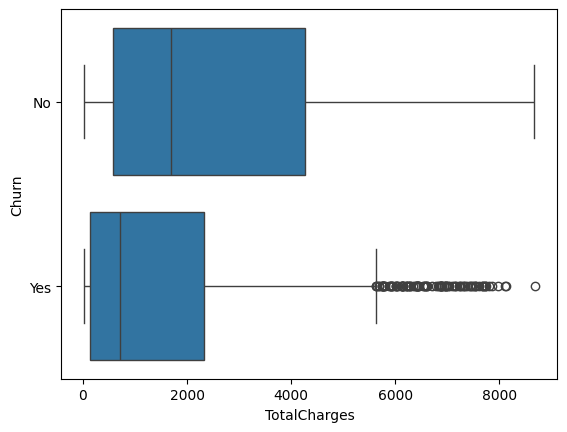

In [ ]:
sns.boxplot(data=df, x='TotalCharges',y='Churn')

<Axes: xlabel='TotalCharges', ylabel='Churn'>

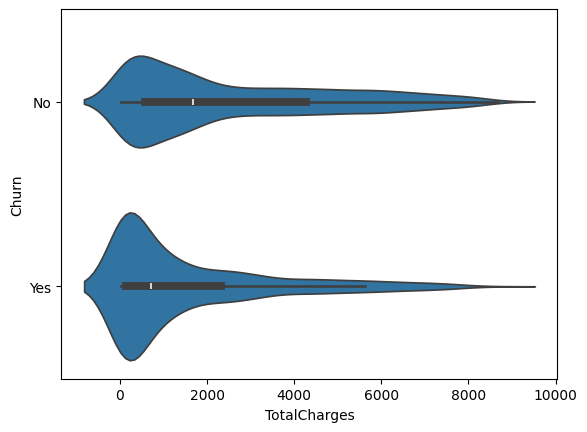

In [ ]:
sns.violinplot(data=df, x='TotalCharges',y='Churn')

Построение графика boxplot с распределением колонки TotalCharges

<Axes: xlabel='TotalCharges', ylabel='Churn'>

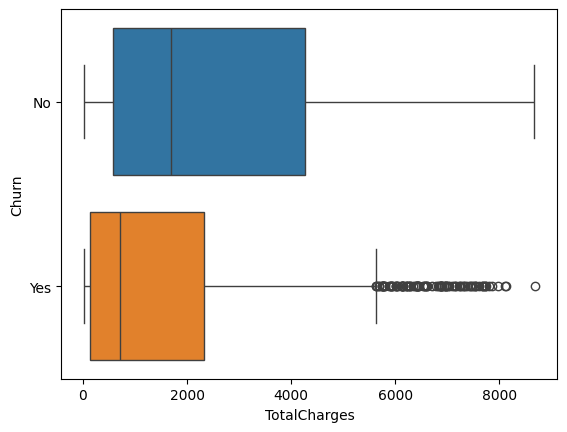

In [ ]:
sns.boxplot(data=df, x='TotalCharges',y='Churn',hue='Churn')

Кодирование категориальных переменных


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder()

In [ ]:
df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']] = encoder.fit_transform(df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']])

In [ ]:
df = df.drop('customerID',axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7028,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7029,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7030,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [ ]:
df['Contract'].unique()

array([0., 1., 2.])

In [ ]:
df['Contract'].value_counts()

Contract
0.0    3875
2.0    1685
1.0    1472
Name: count, dtype: int64

Гистограмма с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.

<Axes: xlabel='tenure', ylabel='Count'>

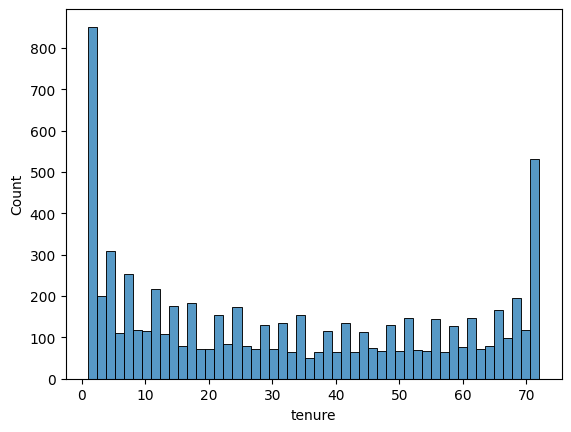

In [ ]:
sns.histplot(data=df, x='tenure',bins=50)

Построение гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract.

<Axes: xlabel='Contract', ylabel='count'>

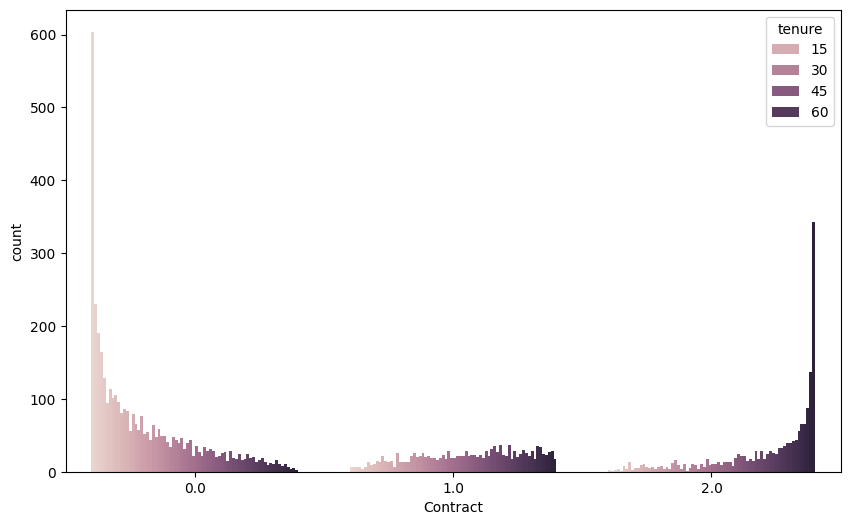

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Contract',hue='tenure')

<Axes: xlabel='Churn', ylabel='count'>

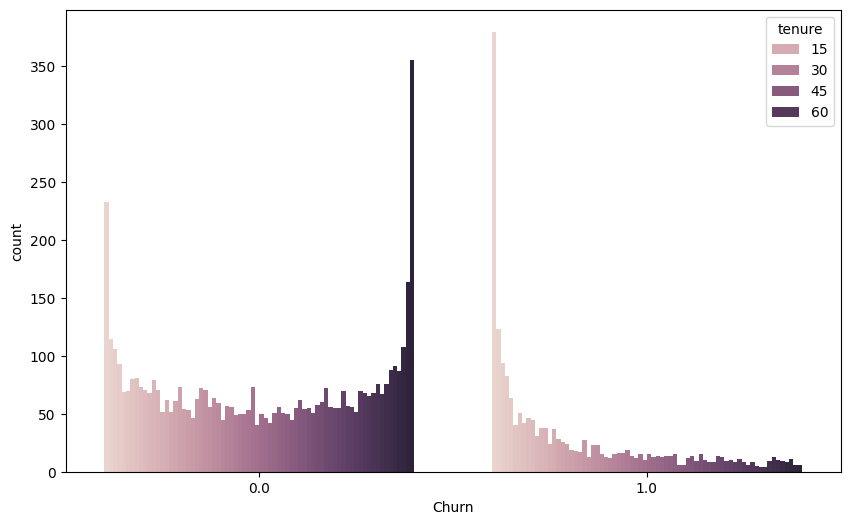

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Churn',hue='tenure')

График scatterplot для колонок Total Charges и Monthly Charges.

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

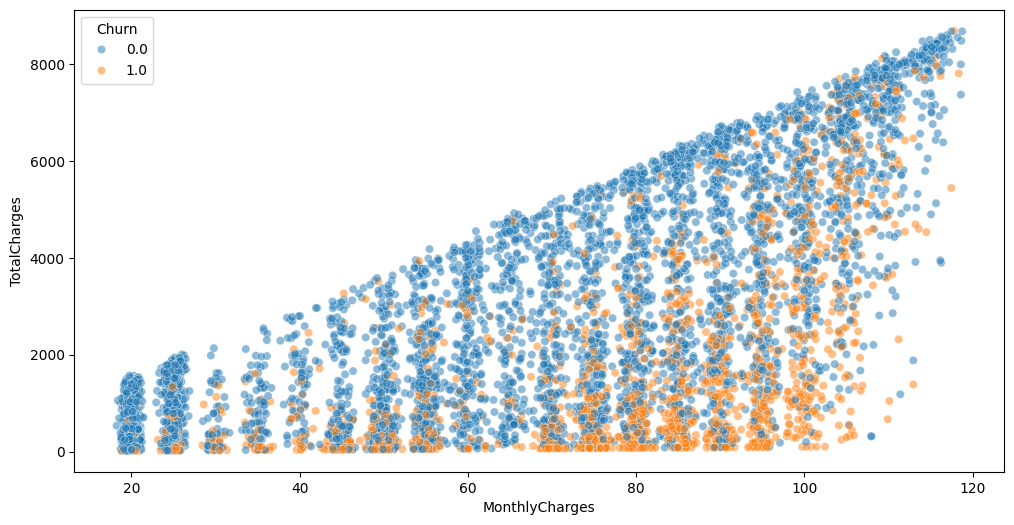

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.5)

Создание сегментов по колонке Tenure


In [ ]:
df['Churn'].groupby(df['tenure']).value_counts()

tenure  Churn
1       1.0      380
        0.0      233
2       1.0      123
        0.0      115
3       0.0      106
                ... 
70      1.0       11
71      0.0      164
        1.0        6
72      0.0      356
        1.0        6
Name: count, Length: 144, dtype: int64

In [ ]:
tenure = []
for i in range(1,73):
  i = len(df[(df['tenure'] == i) & (df['Churn'] == 1.0)])  /  len(df[df['tenure'] == i]) * 100
  tenure.append(i)

In [ ]:
tenure_pd = pd.DataFrame(tenure)

In [ ]:
tenure_pd.index += 1

In [ ]:
tenure_pd.rename(columns = {0:'% Churn'}, inplace = True )

In [ ]:
tenure_pd = tenure_pd.reset_index()

In [ ]:
tenure_pd.rename(columns = {'index':'Tenure'}, inplace = True )

In [ ]:
tenure_pd

,Tenure,% Churn
0,1,61.990212
1,2,51.680672
2,3,47.000000
3,4,47.159091
4,5,48.120301
...,...,...
67,68,9.000000
68,69,8.421053
69,70,9.243697
70,71,3.529412


График процента оттока для различных значений tenure

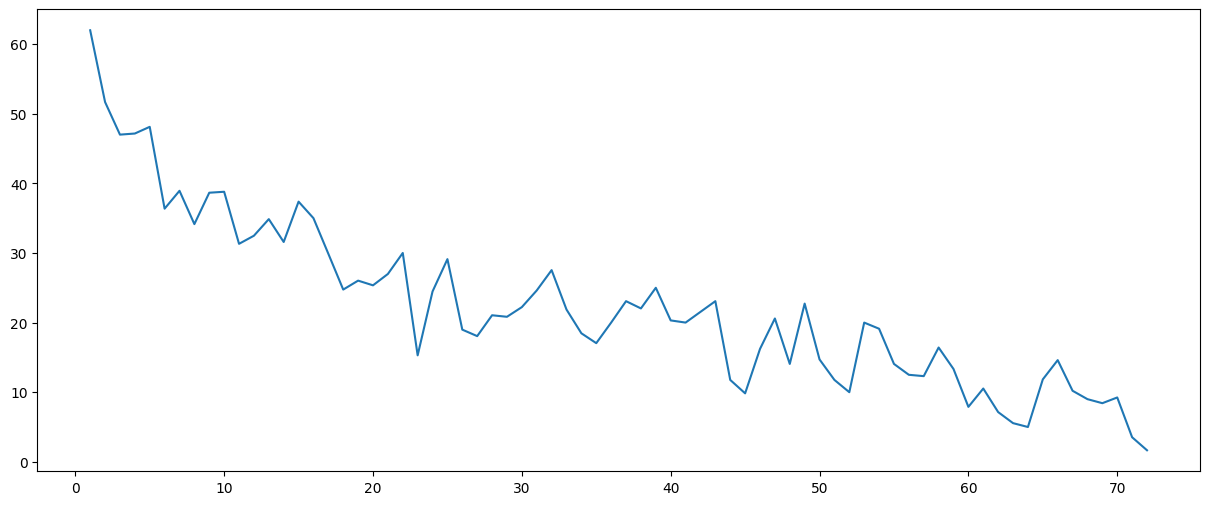

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(tenure_pd["Tenure"], tenure_pd["% Churn"])

4 категории:
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [ ]:
def cohorts(x):
    if x <= 12:
        return "0-12 Months"
    elif x > 12 and x <= 24:
        return "12-24 Months"
    elif x > 24 and x <= 48:
        return "24-48 Months"
    else:
        return 'Over 48 Months'

In [ ]:
df['Tenure Cohort'] = df['tenure'].apply(cohorts)

In [ ]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


График scatterplot для Total Charges и Monthly Charts

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

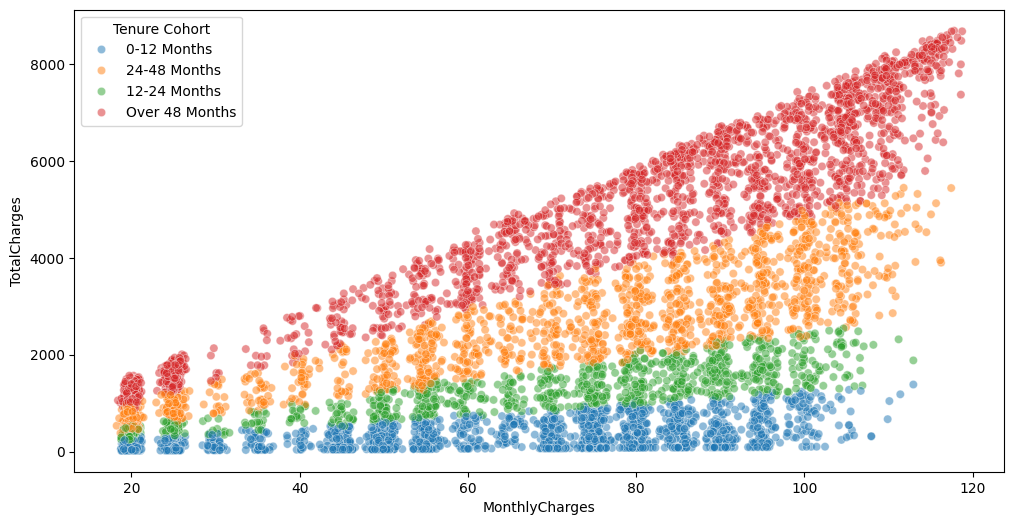

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Tenure Cohort', alpha=0.5)

График countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.

<Axes: xlabel='Tenure Cohort', ylabel='count'>

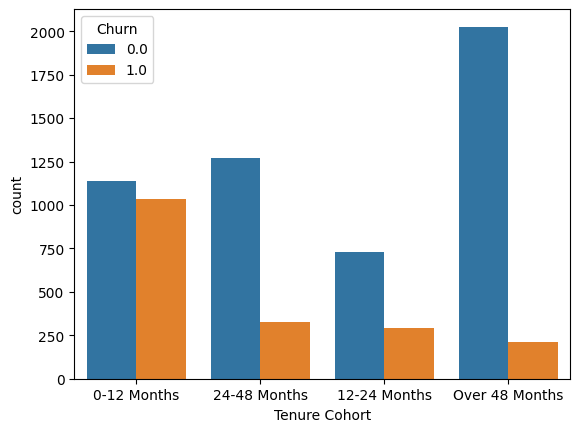

In [ ]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

In [ ]:
df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn','Tenure Cohort', 'tenure']] = encoder.fit_transform(df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn','Tenure Cohort', 'tenure']])

In [ ]:
X = df.drop('Churn',axis=1)

In [ ]:
y = df['Churn']

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
0,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0,0.0
1,1.0,0,0.0,0.0,33.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0,2.0
2,1.0,0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0,0.0
3,1.0,0,0.0,0.0,44.0,0.0,1.0,0.0,2.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0,2.0
4,0.0,0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0,1.0,1.0,23.0,1.0,2.0,0.0,2.0,0.0,...,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0,1.0
7028,0.0,0,1.0,1.0,71.0,1.0,2.0,1.0,0.0,2.0,...,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0,3.0
7029,0.0,0,1.0,1.0,10.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0,0.0
7030,1.0,1,1.0,0.0,3.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0,0.0


**Построение модели Decision Tree, с поиском гиперпараметров по сетке,
затем вывод отчёта "classification report" и матрицы ошибок для предсказанных результатов на тестовом наборе данных**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=30, min_samples_leaf=4)

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=30,
                       min_samples_leaf=4)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [10,14,20,25,30],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,4,5]
}

In [ ]:
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              max_leaf_nodes=30,
                                              min_samples_leaf=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [10, 14, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=30,
                       min_samples_leaf=4)

In [ ]:
pred = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       557
         1.0       0.59      0.43      0.50       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.69       704
weighted avg       0.80      0.82      0.81       704



In [ ]:
cm = confusion_matrix(y_test, pred)

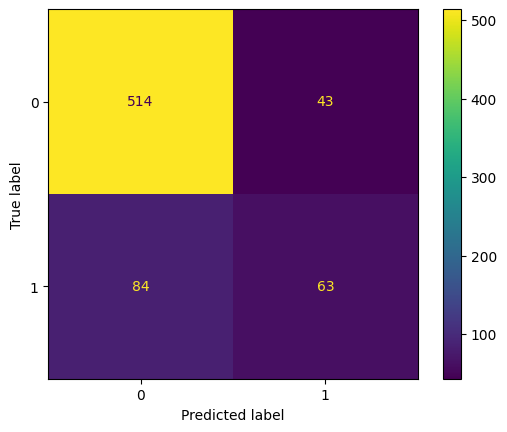

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Определение важности признаков, для целевой переменной.

In [ ]:
dtc.feature_importances_

array([0.        , 0.00793515, 0.        , 0.00228623, 0.1049867 ,
       0.        , 0.        , 0.07237553, 0.1357119 , 0.        ,
       0.        , 0.        , 0.        , 0.00588624, 0.57446012,
       0.        , 0.00524125, 0.05987026, 0.03124662, 0.        ])

In [ ]:
feat_imp = pd.DataFrame(data=dtc.feature_importances_, index=X.columns, columns=['Важность'])

In [ ]:
feat_imp_2 = pd.DataFrame(data=dtc.feature_importances_, index=X.columns, columns=['Важность'])

In [ ]:
feat_imp_2.sort_values('Важность')

,Важность
gender,0.000000
PaperlessBilling,0.000000
StreamingTV,0.000000
TechSupport,0.000000
DeviceProtection,0.000000
MultipleLines,0.000000
OnlineBackup,0.000000
Partner,0.000000
PhoneService,0.000000
Tenure Cohort,0.000000


In [ ]:
feat_imp = feat_imp.sort_values('Важность')

In [ ]:
feat_imp = feat_imp[feat_imp['Важность'] > 0]

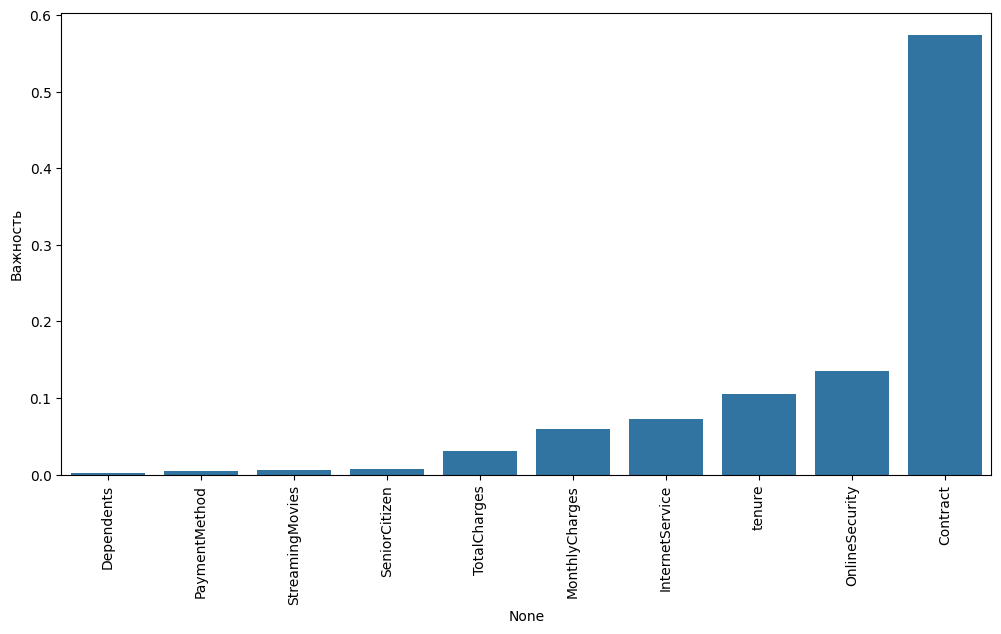

In [ ]:
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(data=feat_imp, x=feat_imp.index, y ='Важность')
plt.xticks(rotation=90);


**Создание модели случайного леса, с поиском гиперпараметров по сетке,
затем вывод отчёта "classification report" и матрицы ошибок для предсказанных результатов на тестовом наборе данных.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
n_estimators = [64,100,128,200]

In [ ]:
max_features = [2,3,4,5]

In [ ]:
bootstrap = [True,False]

In [ ]:
oob_score = [True,False]

In [ ]:
param_grid_rfc = {'n_estimators': n_estimators,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'oob_score': oob_score}

In [ ]:
grid_rfc = GridSearchCV(rfc, param_grid_rfc)

In [ ]:
grid_rfc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [ ]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100, 'oob_score': True}

In [ ]:
pred_rfc = grid_rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87       557
         1.0       0.51      0.47      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



In [ ]:
cm_rfc = confusion_matrix(y_test, pred_rfc)

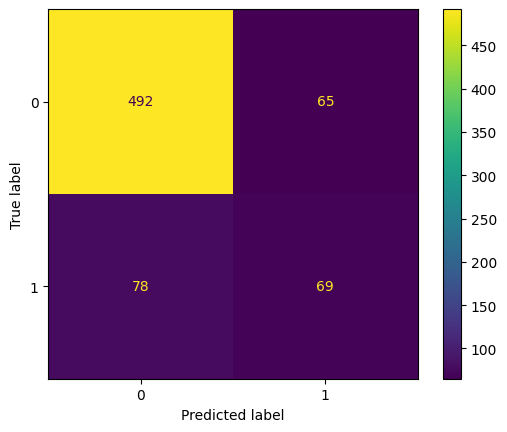

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot()
plt.show()



**Создание модели Gradient Boosting, затем вывод отчёта "classification report" и матрицы ошибок.**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_boost = GradientBoostingClassifier()

In [ ]:
param_grid_grad = {'n_estimators':[50,100,150],
                   'learning_rate':[0.1,0.05,0.2],
                   'max_depth': [2,3,4]
                   }

In [ ]:
grid_boost = GridSearchCV(grad_boost, param_grid_grad)

In [ ]:
grid_boost.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [ ]:
grid_boost.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}

In [ ]:
pred_boost = grid_boost.predict(X_test)

In [ ]:
print(classification_report(y_test,pred_boost))

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       557
         1.0       0.58      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [ ]:
cm_rfc = confusion_matrix(y_test, pred_rfc)

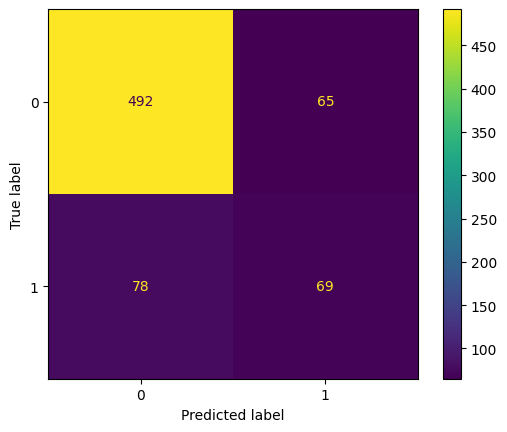

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot()
plt.show()

Построение модели Опорных Векторов, вывода отчёта "classification report" и матрицы ошибок.

In [ ]:
from sklearn.svm import SVC

In [ ]:
supvm = SVC()

In [ ]:
param_grid_svc = {'C':[0.01,0.1,1], 'kernel':['linear', 'rbf']}

In [ ]:
grid_svc = GridSearchCV(supvm,param_grid_svc)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scal_X_train = scaler.fit_transform(X_train)

In [ ]:
scal_X_test = scaler.fit_transform(X_test)

In [ ]:
grid_svc.fit(scal_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [ ]:
pred_svc = grid_svc.predict(scal_X_test)

In [ ]:
grid_svc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       557
         1.0       0.58      0.52      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.82      0.82      0.82       704



In [ ]:
cm_svc = confusion_matrix(y_test, pred_svc)

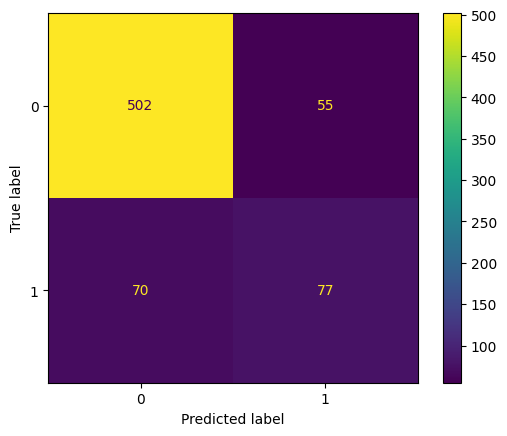

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()